In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

### ML-100K

In [6]:
df = pd.read_csv("results/new_ratings_ml100k.csv")

In [7]:
df.head()

,user,item,rating,timestamp,r_low,r_mid,r_high,rating_cat,new_ratings
0,196,242,3,881250949,0.606531,1.000000,0.606531,med,3.000000
1,186,302,3,891717742,0.606531,1.000000,0.606531,med,3.000000
2,22,377,1,878887116,1.000000,0.606531,0.135335,low,2.167932
3,244,51,2,880606923,0.882497,0.882497,0.324652,var,3.623106
4,166,346,1,886397596,1.000000,0.606531,0.135335,low,3.898723


In [8]:
df.drop("timestamp",axis=1,inplace=True)

In [9]:
df.head()

,user,item,rating,r_low,r_mid,r_high,rating_cat,new_ratings
0,196,242,3,0.606531,1.000000,0.606531,med,3.000000
1,186,302,3,0.606531,1.000000,0.606531,med,3.000000
2,22,377,1,1.000000,0.606531,0.135335,low,2.167932
3,244,51,2,0.882497,0.882497,0.324652,var,3.623106
4,166,346,1,1.000000,0.606531,0.135335,low,3.898723


In [10]:
print("Unique users", len(df.user.unique()))
print("Unique items", len(df.item.unique()))

Unique users 943
Unique items 1682


Text(0.5, 1.0, 'Number of ratings for different rating categories')

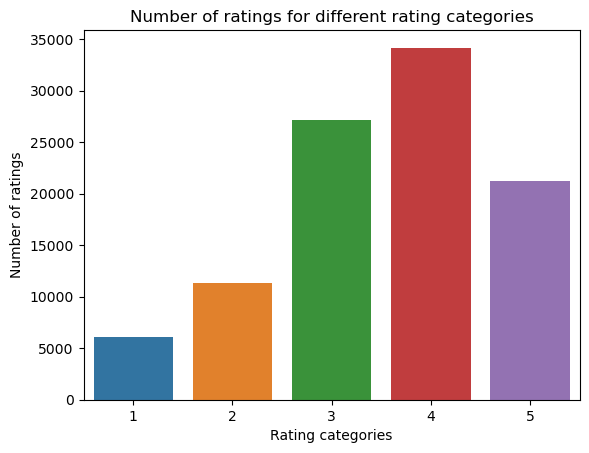

In [11]:
counter = df.rating.value_counts()
sns.barplot(x=counter.index,y=counter.values)
plt.xlabel("Rating categories")
plt.ylabel("Number of ratings")
plt.title("Number of ratings for different rating categories")

Text(0.5, 1.0, 'Number of items rated by various users')

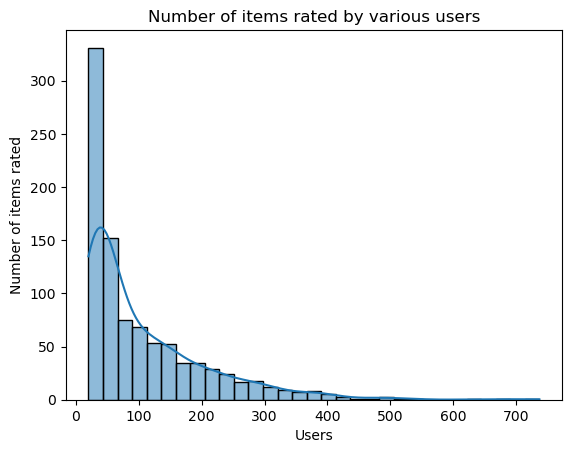

In [12]:
ratings_per_user = df[["user","item"]].groupby("user").count()
sns.histplot(data=ratings_per_user,x="item",kde=True)
plt.xlabel("Users")
plt.ylabel("Number of items rated")
plt.title("Number of items rated by various users")

Text(0.5, 1.0, 'Number of ratings on various items')

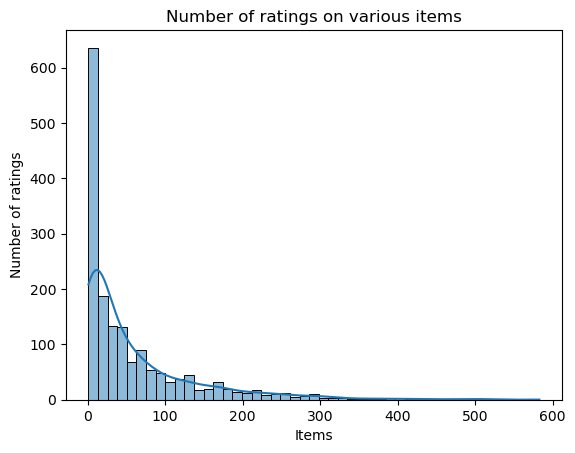

In [13]:
ratings_per_item = df[["user","item"]].groupby("item").count()
sns.histplot(data=ratings_per_item,x="user",kde=True)
plt.xlabel("Items")
plt.ylabel("Number of ratings")
plt.title("Number of ratings on various items")

<Axes: xlabel='rating_cat', ylabel='count'>

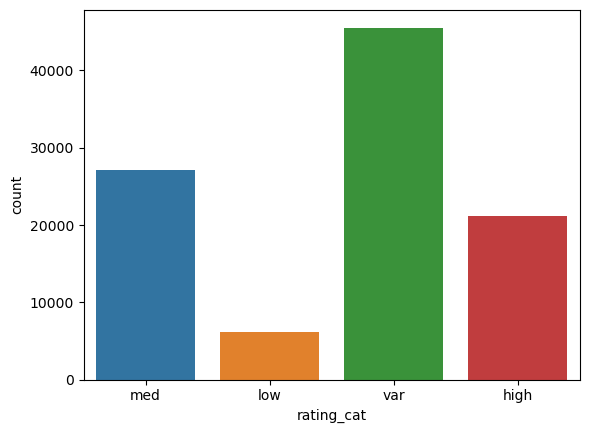

In [14]:
sns.countplot(x=df["rating_cat"])

In [15]:
df[df["rating_cat"]=="var"].rating.value_counts()

4    34174
2    11370
Name: rating, dtype: int64

In [16]:
df.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

In [17]:
def assign_class(row):
    if row["r_low"] > row["r_mid"] and row["r_low"] > row["r_high"]:
        return "low"
    elif row["r_mid"] > row["r_low"] and row["r_mid"] > row["r_high"]:
        return "mid"
    elif row["r_high"] > row["r_low"] and row["r_high"] > row["r_mid"]:
        return "high"
    return "var"

df_user = df[["user", "r_low", "r_mid", "r_high"]].groupby("user").mean()
df_user["cat"] = df_user.apply(assign_class, axis=1)

<Axes: xlabel='cat', ylabel='count'>

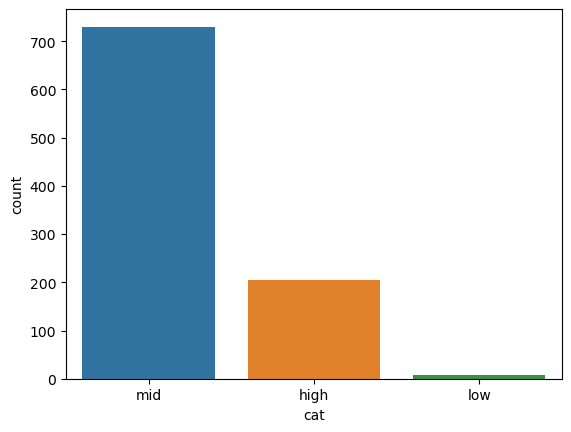

In [25]:
sns.countplot(x=df_user.cat)

In [19]:
df_item = df[["item", "r_low", "r_mid", "r_high"]].groupby("item").mean()
df_item["cat"] = df_item.apply(assign_class, axis=1)

<Axes: xlabel='cat', ylabel='count'>

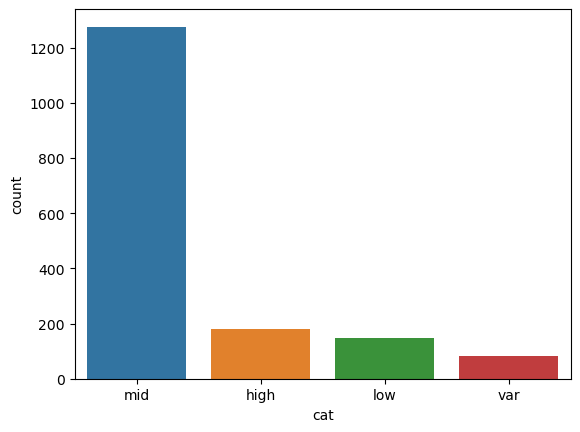

In [27]:
sns.countplot(x=df_item.cat)

In [33]:
rating_counter = pd.DataFrame(np.zeros((4,4)),index=["uhigh","umed","ulow","uvar"], columns=["ihigh","imed","ilow","ivar"])

KeyError: 'uhigh'